In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#**Exemplo do video**

$i(t) = i_0*e^{-t/\tau}$


$ln(i_{(t)}) = ln(i_0) - ln(e^{-t/\tau})$


$ln(i_{(t)}) = ln(i_0) - t/\tau$

Reformulando a equação:

1.   $H(t) = ln(i_{(t)})$
2.   $a_0 = ln(i_0)$
3.   $a_1 = -1/\tau$


$H(t) = a_0 + a_1 * t$


Criação dos vetores colunas dos valores iniciais e dos pontos dados, como tabém a criação do vetor coluna de: 

$H(t) = ln(i_{(t)})$

In [ ]:
t = np.array([[0.2], [1], [2], [3], [4]])
it = np.array([[4], [1.8], [0.7], [0.25], [0.1]])

Ht = np.array(np.log(it))

print(f'Valores de t:\n{t}\n')
print(f'Valores de i(t):\n{it}\n')
print(f'Valores de H(t):\n{Ht}\n')

Valores de t:
[[0.2]
 [1. ]
 [2. ]
 [3. ]
 [4. ]]

Valores de i(t):
[[4.  ]
 [1.8 ]
 [0.7 ]
 [0.25]
 [0.1 ]]

Valores de H(t):
[[ 1.38629436]
 [ 0.58778666]
 [-0.35667494]
 [-1.38629436]
 [-2.30258509]]



Criação da matriz X para a solução dos Minimos Quadrados a partir da equação

$X * a = y$


$X^T * X * â = X^T * y$

Lembrando que nesse sistema utilizamos do $H(t)$ de vez do $y$, portanto a equação fica:

$X^T * X * â = X^T * H$

In [ ]:
aux = np.ones((5,1))
X = np.concatenate((aux, t), 1)
print(f"matriz X:\n{X}\n")

Xt = np.transpose(X)
print(f"matriz ^t:\n{Xt}\n")

XtX = Xt @ X
print(f"matriz X^t*X:\n{XtX}\n")

matriz X:
[[1.  0.2]
 [1.  1. ]
 [1.  2. ]
 [1.  3. ]
 [1.  4. ]]

matriz ^t:
[[1.  1.  1.  1.  1. ]
 [0.2 1.  2.  3.  4. ]]

matriz X^t*X:
[[ 5.   10.2 ]
 [10.2  30.04]]



In [ ]:
Xty = Xt @ Ht
print(f"matriz y:\n{Xty}\n")

matriz y:
[[ -2.07147337]
 [-13.21752781]]



Solução do sistema a partir da equação:

$a0, a1 = (X^T*X)^{-1} * (X^T*y)$

In [ ]:
a0_a1 = np.linalg.inv(XtX) @ Xty
print(f"Soluções:\n{a0_a1}\n")

Soluções:
[[ 1.57261099]
 [-0.97397337]]



Após achar os valores de a0 e a1, utilizamos esses valores para achar os valores de $i_0$ e $\tau$ na equação original

$i(t) = i_0*e^{-t/\tau}$

Com isso basta substituirmos nas equações:



1.   $a_0 = ln(i_0)$

    $i_0 = e^{a_0}$


2.   $a_1 = -1/\tau$

    $\tau = -1/a_1$


In [ ]:
io = np.exp(a0_a1[0])
print(f'io:{io}\n')

tau = -1/a0_a1[1]
print(f"Tau:{tau}\n")

io:[4.81921473]

Tau:[1.02672212]



Por fim basta substituirmos na equação original.

$i(t) = 4,819*e^{-t/1,026}$

**OBSERVAÇÃO**
Garatimos o menor erro quadrático para a função linearizada:

$H(t) = a_0 + a_1 * t$

Isso não pode ser garantido para a função original.

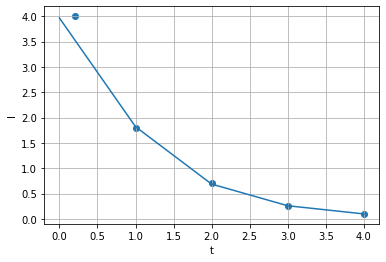

In [ ]:
plt.scatter(t, it)
plt.plot((io*np.exp(-t/tau)))

plt.grid()
plt.xlabel("t")
plt.ylabel("I")

plt.show()

#**Exemplo Qualquer**


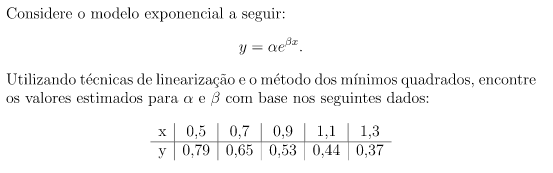

Primeiro simplificamos a equação utilizando do $ln$ em ambos os lados:

$y = \alpha e^{\beta x}$

$ln(y) = ln(\alpha e^{\beta x})$

$ln(y) = ln(\alpha) + ln(e^{\beta x})$

$ln(y) = ln(\alpha) + \beta x$

Simplificando a equação para uma linear:

$H(t) = ln(y)$

$a_0 = ln(\alpha)$

$a_1 = \beta$

Portanto:

$H(t) = a_0 + a_1x$

In [ ]:
x = np.array([[0.5], [0.7], [0.9], [1.1], [1.3]])
y = np.array([[0.79], [0.65], [0.53], [0.44], [0.37]])

print(f'Valores de x:\n{x}\n')
print(f'Valores de y:\n{y}\n')

Ht = np.array(np.log(y))

print(f'Valores de H(t):\n{Ht}\n')

Valores de x:
[[0.5]
 [0.7]
 [0.9]
 [1.1]
 [1.3]]

Valores de y:
[[0.79]
 [0.65]
 [0.53]
 [0.44]
 [0.37]]

Valores de H(t):
[[-0.23572233]
 [-0.43078292]
 [-0.63487827]
 [-0.82098055]
 [-0.99425227]]



Agora criamos o sistema impossivel por meio de matrizes. Como a equação é:

$H(t) = a_0 + a_1x$

Resultará numa matriz de Vandemonde, pois o valor de $x$ no $a_0$ sempre será um.

Também iremos criar a matriz transposta de $X$ para montar um sistema possivel, como nas equações já estudadas:

$X * a = y$


$X^T * X * â = X^T * y$

In [ ]:
vand = np.ones((5,1))
X = np.concatenate((vand, x), 1)

print(f'Matriz X:\n{X}\n')

Xt = np.transpose(X)
print(f'Matriz X^T:\n{Xt}\n')

XtX = Xt @ X
print(f'Matriz X^T*X:\n{XtX}\n')

Xty = Xt @ Ht
print(f'Matriz X^T * y:\n{Xty}\n')

Matriz X:
[[1.  0.5]
 [1.  0.7]
 [1.  0.9]
 [1.  1.1]
 [1.  1.3]]

Matriz X^T:
[[1.  1.  1.  1.  1. ]
 [0.5 0.7 0.9 1.1 1.3]]

Matriz X^T*X:
[[5.   4.5 ]
 [4.5  4.45]]

Matriz X^T * y:
[[-3.11661635]
 [-3.18640622]]



Agora encontramos as soluções de $a_0$ e $a_1$ do sistema a partir da equação:

$a0, a1 = (X^T*X)^{-1} * (X^T*y)$


In [ ]:
a0_a1 = np.linalg.inv(XtX) @ Xty
print(f'Soluções a0 e a1:\n{a0_a1}\n')

Soluções a0 e a1:
[[ 0.23494261]
 [-0.95362876]]



Encontrado os $a_0$ e $a_1$ substituirmos nas equações:

$a_0 = ln(\alpha)$

$a_1 = \beta$

Para encontrar os valores de $\alpha$ e $\beta$.

1.  $\alpha = e^{a_0}$
2.  $\beta = a_1$

In [ ]:
alpha = np.exp(a0_a1[0])
beta = a0_a1[1]

print(f"Valor de Alpha: {alpha}\n")
print(f"Valor de Beta: {beta}\n")

Valor de Alpha: [1.26483618]

Valor de Beta: [-0.95362876]



Equação final ficará:

$y = \alpha e^{\beta x}$

$y = 1.26 e^{-0.95x}$


#**MINITESTE**

A partir da função 

$f(x) = \sqrt{a + bx}$

e dos conjuntos de pontos (2.2; 3.198), (2.3; 2.954) e (4.6; 4.352) encontrar o valor de $f(4.2)$

In [ ]:
import numpy as np

x = np.array([
              [2.2],
              [2.3],
              [4.6],
])

y = np.array([
              [3.198],
              [2.945],
              [4.352],
])

Ht = np.array(y**2)



array([[10.227204],
       [ 8.673025],
       [18.939904]])

In [ ]:
X = np.ones((3,1))
X = np.concatenate((X, x),1)
print(X)

[[1.  2.2]
 [1.  2.3]
 [1.  4.6]]


In [ ]:
Xt = np.transpose(X)
print(Xt,"\n")

XtX = Xt @ X
print(XtX,"\n")

Xty = Xt @ Ht
print(Xty,"\n")


[[1.  1.  1. ]
 [2.2 2.3 4.6]] 

[[ 3.    9.1 ]
 [ 9.1  31.29]] 

[[ 37.840133 ]
 [129.5713647]] 



In [ ]:
ab = np.linalg.inv(XtX) @ Xty

print(ab)

[[0.44469646]
 [4.01165315]]


In [ ]:
resultado = np.sqrt(ab[0]+ab[1]*4.2)
print(resultado)

[4.15856221]
